In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import pandas as pd
import numpy as np
from modules.file import CPandasFile
from modules.holt_winters import CHoltWinters

In [4]:
pandas_file = CPandasFile()

1. Đọc dữ liệu

In [9]:
data = pandas_file.readExcel('./data/champagne_new.xlsx').set_index(['Month'])
data

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


2. Decomposition

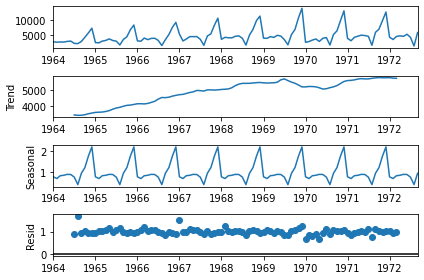

In [11]:
hw = CHoltWinters(data)
hw.decomposition()

3.Chia dữ liệu thành train và test

In [13]:
train, test = data.iloc[:80, 0], data.iloc[80:, 0]

4. Build model

In [14]:
hw.initModel(train)
y_hat = hw.predict(test)

y_hat

/home/manhcuong/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/manhcuong/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


1970-09-01     4746.876218
1970-10-01     6133.590625
1970-11-01     9091.576240
1970-12-01    11032.717241
1971-01-01     3205.906525
1971-02-01     3354.792485
1971-03-01     3843.125221
1971-04-01     4030.722306
1971-05-01     3912.803697
1971-06-01     4484.606238
1971-07-01     3996.365695
1971-08-01     1721.886125
1971-09-01     4746.876218
1971-10-01     6133.590625
1971-11-01     9091.576240
1971-12-01    11032.717241
1972-01-01     3205.906525
1972-02-01     3354.792485
1972-03-01     3843.125221
1972-04-01     4030.722306
1972-05-01     3912.803697
1972-06-01     4484.606238
1972-07-01     3996.365695
1972-08-01     1721.886125
1972-09-01     4746.876218
Freq: MS, dtype: float64

5. Trực quan hóa

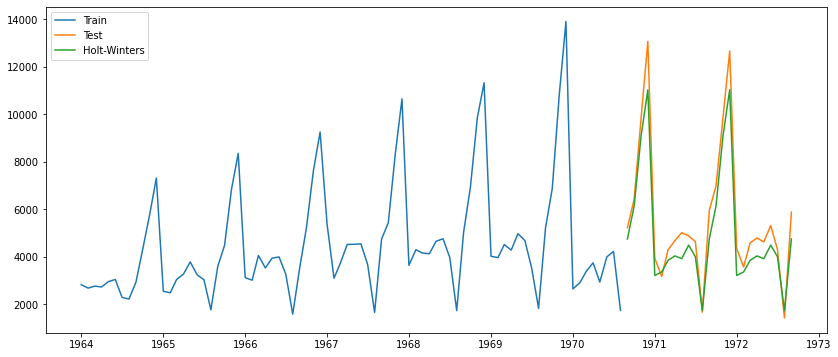

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(y_hat.index, y_hat, label='Holt-Winters')
plt.legend(loc='best')

plt.show()

5. Dự đoán trong 9 tháng tới

In [19]:
data.tail()

,monthly_champange
Month,
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298
1972-08-01,1413
1972-09-01,5877


In [20]:
import datetime

s = datetime.datetime(1971,12, 1)
e = datetime.datetime(1972, 9, 1)

pred_next_9_month = hw.model.predict(start=s, end=e)

pred_next_9_month

1971-12-01    11032.717241
1972-01-01     3205.906525
1972-02-01     3354.792485
1972-03-01     3843.125221
1972-04-01     4030.722306
1972-05-01     3912.803697
1972-06-01     4484.606238
1972-07-01     3996.365695
1972-08-01     1721.886125
1972-09-01     4746.876218
Freq: MS, dtype: float64

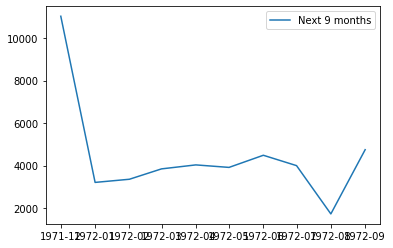

In [21]:
x = pd.Series(pred_next_9_month)

plt.plot(x.index, x.values, label="Next 9 months")
plt.legend(loc="best")

plt.show()

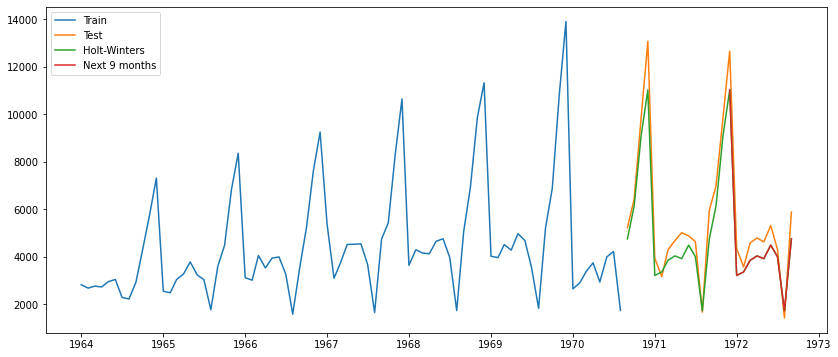

In [22]:
plt.figure(figsize=(14,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(y_hat.index, y_hat, label='Holt-Winters')
plt.plot(x.index, x.values, label='Next 9 months')
plt.legend(loc='best')

plt.show()